## Final Project Submission

Please fill out:
* Student name: Thai Hang Nguyen
* Student pace: part time 
* Scheduled project review date/time: 14/05/2023
* Instructor name: Hardik
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
df2 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
#df1

In [3]:
#df1[pd.isnull(df1["foreign_gross"])]

In [4]:
df1_rename ={"title": "Movie", "studio": "Studio", "domestic_gross": "Domestic Gross", "foreign_gross": "Foreign Gross", "year": "Year"}
df1 = df1.rename(columns =df1_rename)
df1

,Movie,Studio,Domestic Gross,Foreign Gross,Year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [5]:
df2

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
df2.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [7]:
df2[df2.columns[3:]] = df2[df2.columns[3:]].replace("[$,]", "", regex = True).astype(float)
df2["release_date"] = pd.to_datetime(df2["release_date"].astype("datetime64[ns]"))
#df2

In [8]:
df2.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
dtype: object

In [9]:
df2["Foreign Gross"] = df2["worldwide_gross"] - df2["domestic_gross"]

In [10]:
df2 = df2.rename(columns = {"id": "ID", "release_date": "Release Date", "movie":"Movie", "production_budget": "Production Budget", "domestic_gross":"Domestic Gross", "worldwide_gross": "Worldwide Gross"})
#df2

In [11]:
df2.isnull().sum()

ID                   0
Release Date         0
Movie                0
Production Budget    0
Domestic Gross       0
Worldwide Gross      0
Foreign Gross        0
dtype: int64

In [12]:
df1 = df1.drop(columns = ["Domestic Gross", "Foreign Gross", "Year"])
df3 = pd.merge(df1, df2, on = "Movie", how = "inner")
#df1

In [13]:
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross
0,Toy Story 3,BV,47,2010-06-18,200000000.0,415004880.0,1.068880e+09,653874642.0
1,Inception,WB,38,2010-07-16,160000000.0,292576195.0,8.355246e+08,542948447.0
2,Shrek Forever After,P/DW,27,2010-05-21,165000000.0,238736787.0,7.562447e+08,517507886.0
3,The Twilight Saga: Eclipse,Sum.,53,2010-06-30,68000000.0,300531751.0,7.061028e+08,405571077.0
4,Iron Man 2,Par.,15,2010-05-07,170000000.0,312433331.0,6.211564e+08,308723058.0
...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000.0,4286367.0,6.089100e+06,1802733.0
1243,Ben is Back,RAtt.,95,2018-12-07,13000000.0,3703182.0,9.633111e+06,5929929.0
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000.0,490973.0,6.485990e+05,157626.0
1245,Mandy,RLJ,71,2018-09-14,6000000.0,1214525.0,1.427656e+06,213131.0


In [14]:
df3[df3.columns[4:8]] = df3[df3.columns[4:8]].astype(int)

In [15]:
df3["Year"] = pd.DatetimeIndex(df3["Release Date"]).year
df3 = df3[df3["Year"].between(2014,2018)]
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross,Year
14,Robin Hood,Uni.,9,2018-11-21,99000000,30824628,84747441,53922813,2018
178,The Girl on the Train,Strand,68,2016-10-07,45000000,75395035,174278214,98883179,2016
341,The Other Woman,IFC,2,2014-04-25,40000000,83911193,195111193,111200000,2014
346,Beautiful Boy,Anch.,95,2018-10-12,25000000,7634767,13031424,5396657,2018
351,Blood Ties,ALP,52,2014-03-21,26000000,42472,2923959,2881487,2014
...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000,4286367,6089100,1802733,2018
1243,Ben is Back,RAtt.,95,2018-12-07,13000000,3703182,9633111,5929929,2018
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000,490973,648599,157626,2018
1245,Mandy,RLJ,71,2018-09-14,6000000,1214525,1427656,213131,2018


In [16]:
Production_mean = df3.groupby("Studio")["Production Budget"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)
Domestic_mean = df3.groupby("Studio")["Domestic Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)
Foreign_mean = df3.groupby("Studio")["Foreign Gross"].agg(["mean"]).sort_values(by= "mean", ascending = False).head(10)

In [17]:
df_mean = pd.merge(Production_mean, Domestic_mean, on = "Studio", how = "inner")
df_total_mean = pd.merge(df_mean, Foreign_mean, on = "Studio", how = "inner")
df_total_mean = df_total_mean.rename(columns = {"count": "Count", "mean_x": "Production Budget", "mean_y":"Domestic Gross", "mean": "Foreign Gross"})
df_total_mean

,Production Budget,Domestic Gross,Foreign Gross
Studio,,,
BV,1.437050e+08,2.198096e+08,3.392210e+08
WB,8.722222e+07,9.465077e+07,1.467406e+08
Fox,7.882143e+07,1.008708e+08,1.926383e+08
Sony,6.294118e+07,9.349693e+07,1.514505e+08
Par.,6.232500e+07,6.671397e+07,1.123956e+08
Uni.,5.263846e+07,1.063211e+08,1.806063e+08


In [18]:
df_total_mean.rename(index = {"BV":"Walt Disney (aka BV)", "WB":"Warner Bros.","Fox": "20th Century (aka Fox)","Sony": "Sony Pictures","Par.": "Paramount Pictures","Uni.": "Universal Pictures"}, inplace = True)

In [19]:
df_total_mean

,Production Budget,Domestic Gross,Foreign Gross
Studio,,,
Walt Disney (aka BV),1.437050e+08,2.198096e+08,3.392210e+08
Warner Bros.,8.722222e+07,9.465077e+07,1.467406e+08
20th Century (aka Fox),7.882143e+07,1.008708e+08,1.926383e+08
Sony Pictures,6.294118e+07,9.349693e+07,1.514505e+08
Paramount Pictures,6.232500e+07,6.671397e+07,1.123956e+08
Universal Pictures,5.263846e+07,1.063211e+08,1.806063e+08


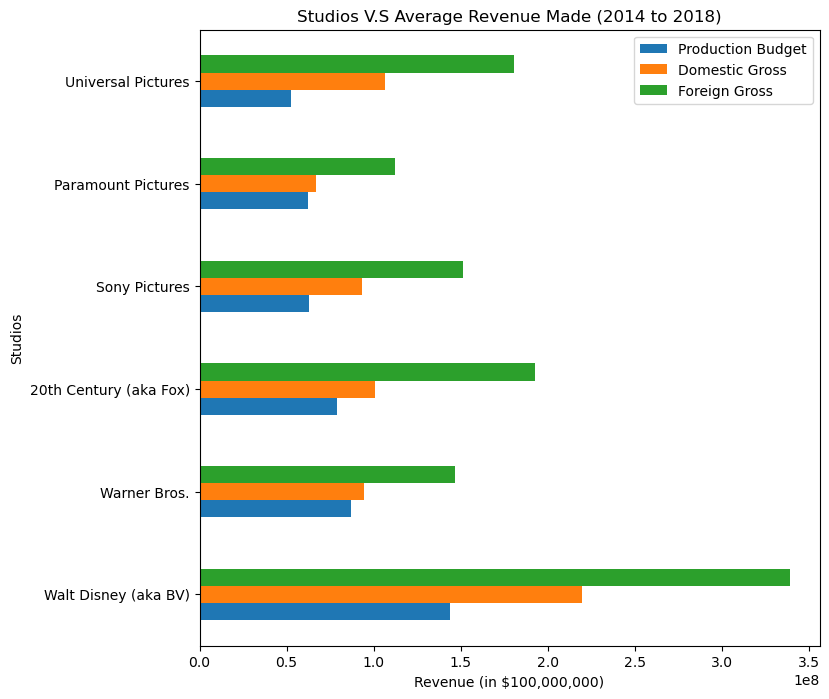

In [20]:
df_total_mean.plot(kind = "barh", figsize = (8, 8))

plt.xlabel("Revenue (in $100,000,000)")
plt.ylabel("Studios")

plt.title("Studios V.S Average Revenue Made (2014 to 2018)")
plt.legend(loc = "upper right")

plt.show()

In [21]:
df3

,Movie,Studio,ID,Release Date,Production Budget,Domestic Gross,Worldwide Gross,Foreign Gross,Year
14,Robin Hood,Uni.,9,2018-11-21,99000000,30824628,84747441,53922813,2018
178,The Girl on the Train,Strand,68,2016-10-07,45000000,75395035,174278214,98883179,2016
341,The Other Woman,IFC,2,2014-04-25,40000000,83911193,195111193,111200000,2014
346,Beautiful Boy,Anch.,95,2018-10-12,25000000,7634767,13031424,5396657,2018
351,Blood Ties,ALP,52,2014-03-21,26000000,42472,2923959,2881487,2014
...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,64,2018-06-15,10000000,4286367,6089100,1802733,2018
1243,Ben is Back,RAtt.,95,2018-12-07,13000000,3703182,9633111,5929929,2018
1244,Bilal: A New Breed of Hero,VE,100,2018-02-02,30000000,490973,648599,157626,2018
1245,Mandy,RLJ,71,2018-09-14,6000000,1214525,1427656,213131,2018


In [22]:
df3["Month"] = df3["Release Date"].apply(lambda x: x.strftime("%B"))
#df3

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_2460\3975028129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Month"] = df3["Release Date"].apply(lambda x: x.strftime("%B"))


In [23]:
df3.dtypes

Movie                        object
Studio                       object
ID                            int64
Release Date         datetime64[ns]
Production Budget             int32
Domestic Gross                int32
Worldwide Gross               int32
Foreign Gross                 int32
Year                          int64
Month                        object
dtype: object

In [24]:
df3 = df3.drop(columns = ["Studio", "Movie", "Release Date", "ID", "Production Budget", "Domestic Gross", "Foreign Gross"])
df3 = df3[df3.Year.between(2014,2018)]
df3 = df3.set_index("Year")
#df3

In [25]:
df3 = df3.groupby(["Year","Month"]).mean()
df3 = df3.reset_index()
df3.head()

,Year,Month,Worldwide Gross
0,2014,April,1.386777e+08
1,2014,August,1.834936e+08
2,2014,December,2.193719e+08
3,2014,February,1.019493e+08
4,2014,January,8.171994e+07


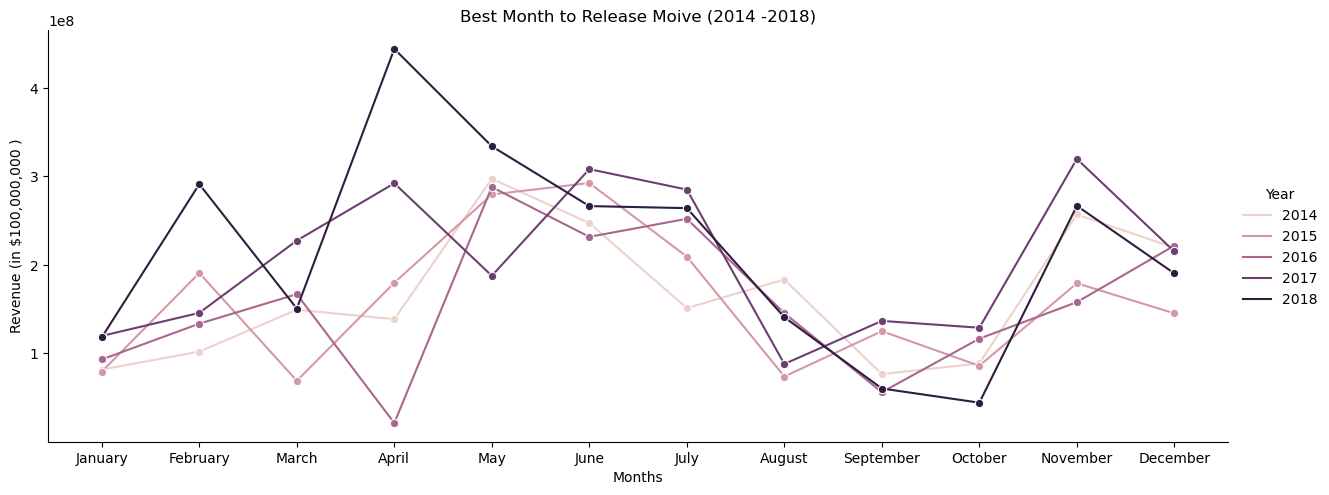

In [26]:
from calendar import month_name as mn
months = mn[1:]
df3.Month = pd.Categorical(df3.Month, categories = months, ordered = True)
p = sns.relplot(kind = "line", data = df3, x = "Month", 
                y = "Worldwide Gross", hue = "Year",
                aspect=2.5, marker='o')
plt.xlabel("Months")
plt.ylabel("Revenue (in $100,000,000 )")
plt.title("Best Month to Release Moive (2014 -2018)")
plt.show()

In [27]:
df4 = pd.read_csv("zippedData/imdb.title.ratings.csv.gz")

df4

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [28]:
df5 = pd.read_csv("zippedData/imdb.title.basics.csv.gz")
df5

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [29]:
df6 = pd.merge(df5, df4, on = "tconst", how = "inner")
df6

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [30]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [31]:
df6.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
dtype: object

In [32]:
df6.numvotes.describe()

count    7.385600e+04
mean     3.523662e+03
std      3.029402e+04
min      5.000000e+00
25%      1.400000e+01
50%      4.900000e+01
75%      2.820000e+02
max      1.841066e+06
Name: numvotes, dtype: float64

In [33]:
df6.start_year.describe()

count    73856.000000
mean      2014.276132
std          2.614807
min       2010.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2019.000000
Name: start_year, dtype: float64

In [34]:
df6 = df6[pd.notnull(df6["genres"])]

In [35]:
df6 = df6[(df6.averagerating > 6.5) & (df6.numvotes > 100000) & (df6.start_year.between(2016,2020))]

In [36]:
df6

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
108,tt0448115,Shazam!,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051
114,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",7.5,487527
253,tt0803096,Warcraft,Warcraft,2016,123.0,"Action,Adventure,Fantasy",6.9,225557
1204,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
1328,tt1211837,Doctor Strange,Doctor Strange,2016,115.0,"Action,Adventure,Fantasy",7.5,514510
...,...,...,...,...,...,...,...,...
63750,tt6823368,Glass,Glass,2019,129.0,"Drama,Sci-Fi,Thriller",6.8,133793
63925,tt6857112,Us,Us,2019,116.0,"Horror,Mystery,Thriller",7.1,102511
64516,tt6966692,Green Book,Green Book,2018,130.0,"Biography,Comedy,Drama",8.3,204972
66395,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005


In [37]:
df6.averagerating.nlargest()

56850    9.3
43420    8.8
43419    8.5
47436    8.5
50962    8.5
Name: averagerating, dtype: float64

In [38]:
df6_genre_split = (df6.assign(genres = df6["genres"].str.split(",")).explode("genres").groupby(["start_year","genres"]).mean())

C:\Users\Thai Ha\AppData\Local\Temp\ipykernel_2460\445829548.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df6_genre_split = (df6.assign(genres = df6["genres"].str.split(",")).explode("genres").groupby(["start_year","genres"]).mean())


In [39]:
df6 = df6_genre_split.reset_index()

In [40]:
df6.columns

Index(['start_year', 'genres', 'runtime_minutes', 'averagerating', 'numvotes'], dtype='object')

In [41]:
df6 = df6.rename(columns ={'start_year': 'Year', 'genres': 'Genres', 'runtime_minutes': 'Run time Minutes', 'averagerating': 'Average Rating', 'numvotes': 'Number of Votes'})

In [42]:
df6.head()

,Year,Genres,Run time Minutes,Average Rating,Number of Votes
0,2016,Action,123.900000,7.480000,255820.900000
1,2016,Adventure,118.562500,7.387500,321731.562500
2,2016,Animation,103.142857,7.614286,184717.142857
3,2016,Biography,129.166667,7.883333,194190.166667
4,2016,Comedy,111.555556,7.600000,305311.555556


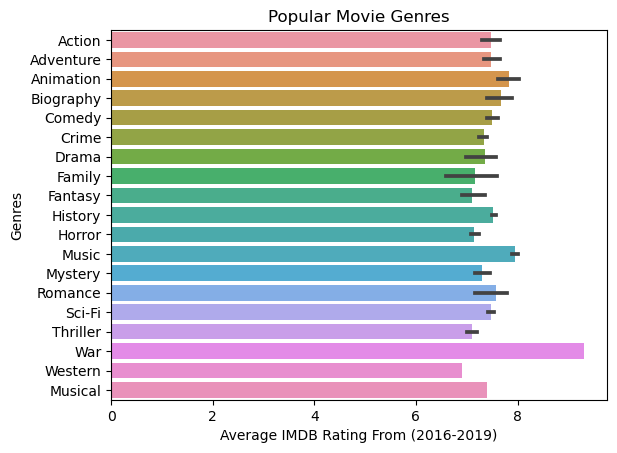

In [43]:
p = sns.barplot(data = df6, x = "Average Rating", y = "Genres", orient = "h")
plt.title("Popular Movie Genres")
plt.xlabel("Average IMDB Rating From (2016-2019)")
plt.show()